In [ ]:
import os
import pandas as pd
import kagglehub
from scipy import stats
import numpy as np
# Download dataset
path = kagglehub.dataset_download("itsmesunil/bank-loan-modelling")

# Full file path
file_path = os.path.join(path, "Bank_Personal_Loan_Modelling.xlsx")

# Read the 2nd sheet (index starts from 0)
df = pd.read_excel(file_path, sheet_name=1, engine='openpyxl')

print("Columns:", df.columns)
print(df)


100%|██████████| 331k/331k [00:00<00:00, 56.4MB/s]

Extracting files...


Columns: Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#Data Cleaing

##Handling Null Values

In [ ]:
df.isna().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


##Handling Duplicates

In [ ]:
df[df.duplicated(keep=False)].sum().sum()

np.float64(0.0)

##Handling Negative Values

In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
for col in df.columns:
  if df[df[col]<0][col].count():
     df[col]=df[col].apply(abs)

##Handling outliers

In [ ]:
df=df.drop(columns=['ID'],axis=1)

In [ ]:
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:

numeric_col=df.select_dtypes(include=['int64','float64']).columns
filter_cols=[col for col in df.columns if df[col].nunique()>10]
filter_cols


z_scores=stats.zscore(df[filter_cols])
z_df = pd.DataFrame(z_scores, columns=filter_cols)
z_df

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
0,-1.774417,-1.676408,-0.538229,-0.964114,-0.193371,-0.555524
1,-0.029524,-0.099404,-0.864109,-1.443932,-0.250595,-0.555524
2,-0.552992,-0.449849,-1.363793,0.738814,-0.536720,-0.555524
3,-0.901970,-0.975517,0.569765,0.452243,0.436103,-0.555524
4,-0.901970,-1.063129,-0.625130,-0.859007,-0.536720,-0.555524
...,...,...,...,...,...,...
4995,-1.425438,-1.501185,-0.733757,-0.214694,-0.021696,-0.555524
4996,-1.338194,-1.413574,-1.276892,-0.525774,-0.880069,0.280238
4997,1.540880,1.652823,-1.081363,-0.061039,-0.937294,-0.555524
4998,1.715370,1.740434,-0.538229,-1.469855,-0.822844,-0.555524


In [ ]:
threshold = 3
df_clean = df.copy()
outliers_dict = {}

for col in filter_cols:
    if col not in ["ID", "ZIP Code"]:
        mask = np.abs(z_df[col]) > threshold
        outliers = df.loc[mask, col]
        if not outliers.empty:
            outliers_dict[col] = outliers
            print(f"\nOutliers detected in column '{col}':")
            print(outliers)


            mean_val = df[col].mean()
            df_clean.loc[mask, col] = mean_val
            print(f"Replaced outliers in '{col}' with mean: {mean_val}")


Outliers detected in column 'Income':
3896    224
4993    218
Name: Income, dtype: int64
Replaced outliers in 'Income' with mean: 73.7742

Outliers detected in column 'CCAvg':
9       8.9
18      8.1
55      8.0
131     7.2
145     7.4
       ... 
4652    8.0
4679    7.2
4782    7.2
4911    7.5
4937    8.6
Name: CCAvg, Length: 121, dtype: float64
Replaced outliers in 'CCAvg' with mean: 1.9379133333333332

Outliers detected in column 'Mortgage':
42      412
59      455
119     366
288     391
303     617
       ... 
4672    550
4698    400
4812    612
4842    590
4859    541
Name: Mortgage, Length: 105, dtype: int64
Replaced outliers in 'Mortgage' with mean: 56.4988


/tmp/ipython-input-83867620.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73.7742' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[mask, col] = mean_val
/tmp/ipython-input-83867620.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '56.4988' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[mask, col] = mean_val


##Feature Unit balancing

In [ ]:
df['CCAvg'] = df['CCAvg']*12

In [ ]:
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,22.8,3,0,0,0,0,1,0
4996,30,4,15,92037,4,4.8,1,85,0,0,0,1,0
4997,63,39,24,93023,2,3.6,3,0,0,0,0,0,0
4998,65,40,49,90034,3,6.0,2,0,0,0,0,1,0


##Finding Correlation between Features

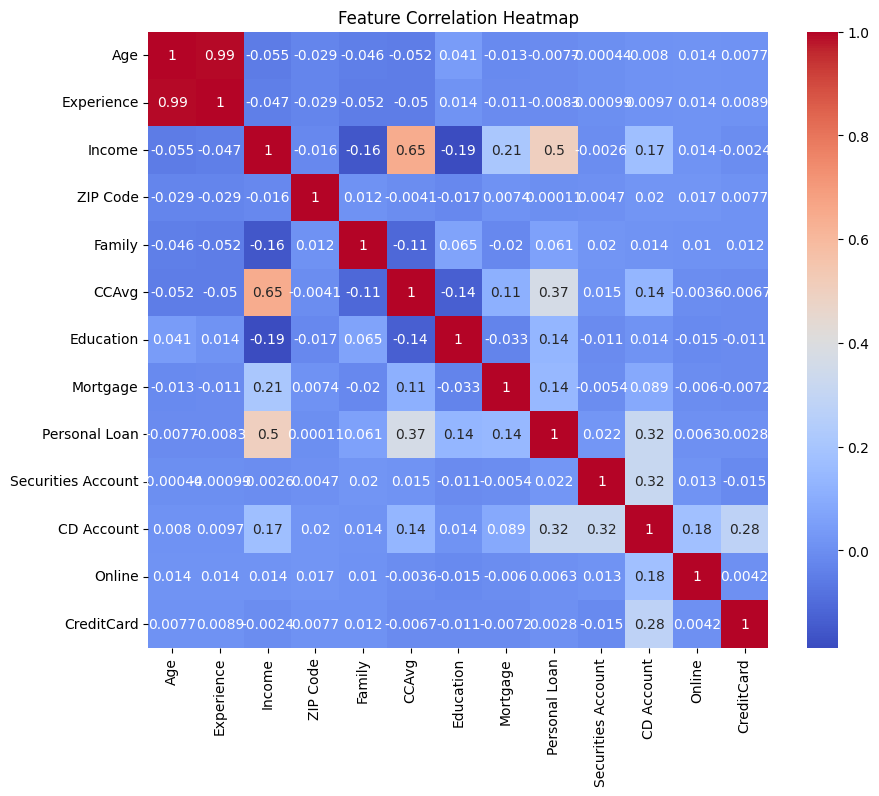

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


X = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

train_error = 1 - accuracy_score(y_train, y_train_pred)
test_error = 1 - accuracy_score(y_test, y_pred)


print("✅ Accuracy test:", accuracy_score(y_test, y_pred))
print("✅ Accuracy train:", accuracy_score(y_train, y_train_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy test: 0.991
✅ Accuracy train: 1.0

📊 Confusion Matrix:
 [[902   2]
 [  7  89]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       904
           1       0.98      0.93      0.95        96

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000

